In [8]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [14]:
# Load the audio file
y, sr = librosa.load('./data/sample_recording.wav', sr=None)



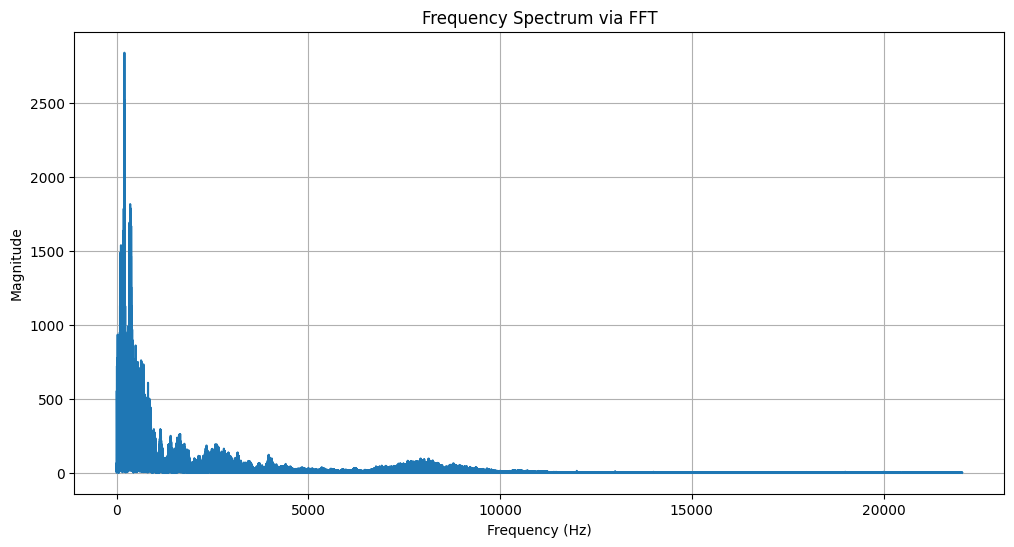

In [18]:
# Take a small portion for analysis (e.g., first second)
# y = y[:sr]  # 1 second of audio

# Apply FFT
fft_result = np.fft.fft(y)

# Get corresponding frequencies
frequencies = np.fft.fftfreq(len(y), d=1/sr)

# Only keep the positive frequencies (real-valued spectrum is symmetric)
half = len(y) // 2
frequencies = frequencies[:half]
magnitude = np.abs(fft_result[:half])  # Magnitude spectrum

# Plot the spectrum
plt.figure(figsize=(12, 6))
plt.plot(frequencies, magnitude)
plt.title("Frequency Spectrum via FFT")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

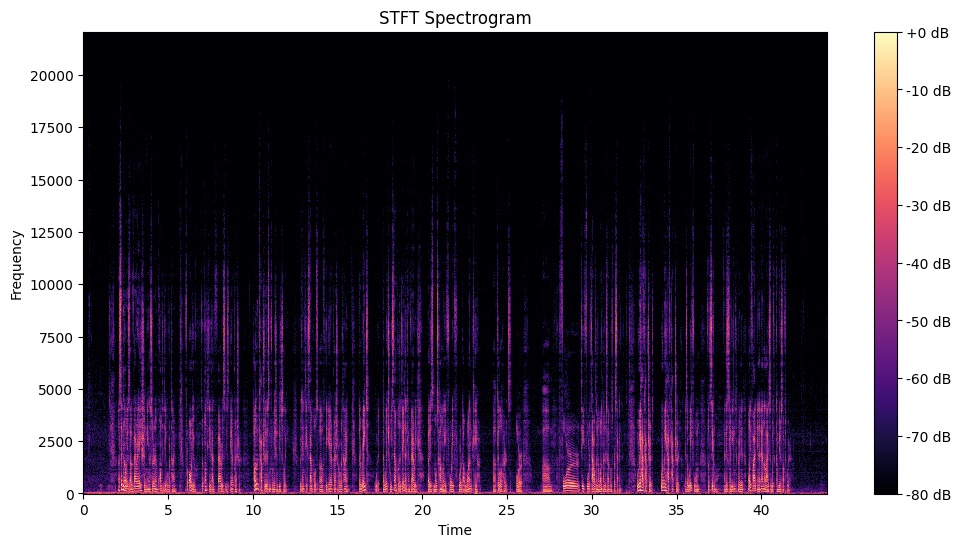

In [19]:
# Compute STFT
D = librosa.stft(y, n_fft=2048, hop_length=512)

# Convert to magnitude (absolute value)
magnitude = np.abs(D)

# Convert to decibels for better visual contrast
db_spectrogram = librosa.amplitude_to_db(magnitude, ref=np.max)

# Plot
plt.figure(figsize=(12, 6))
librosa.display.specshow(db_spectrogram, sr=sr, hop_length=512, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()



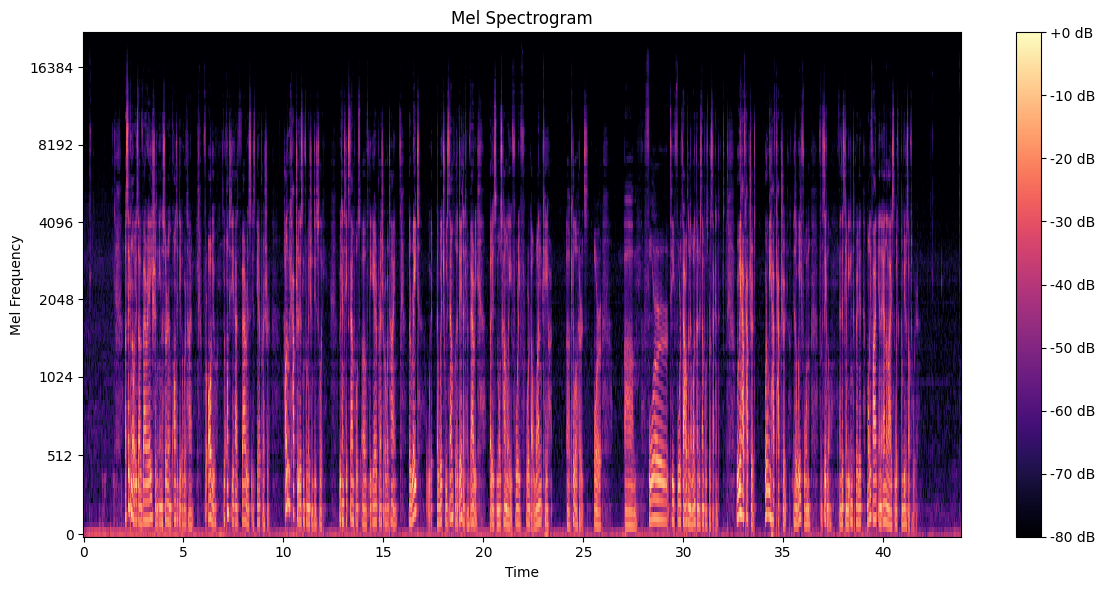

In [20]:
# Compute mel spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512, n_mels=128)

# Convert power (energy) to decibels for visualization
S_db = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 6))
librosa.display.specshow(S_db, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time')
plt.ylabel('Mel Frequency')
plt.tight_layout()
plt.show()

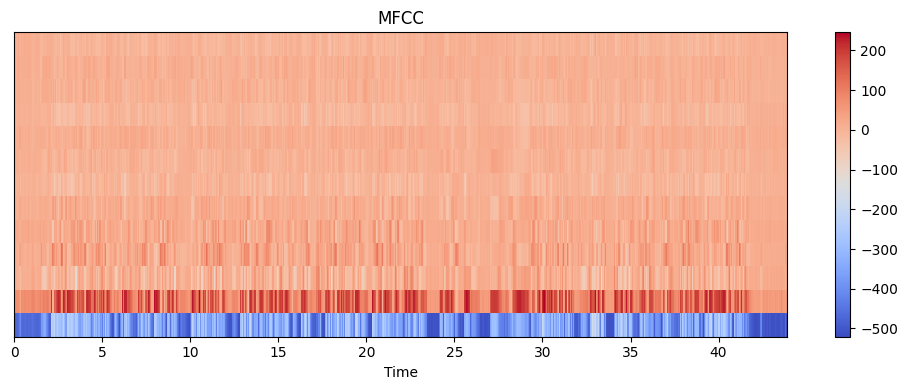

In [21]:
# Compute MFCCs
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Plot
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()